# 05.03 Principal Component Analysis


In [3]:
# Load libraries
import pandas as pd
import numpy as np
from math import log

import seaborn as sns
sns.set_style("ticks")
sns.set_palette("Blues")


import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import category_encoders as ce

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn import metrics

Read and load data into X and y

In [4]:
df = pd.read_csv("data/05.00 Incident Data.csv")

y = df.SLAFail

X = df.drop(['SLAFail'], axis='columns')
# Set `Open_Time_HourOfDay` for recognition as a Categorical variable
X.Open_Time_HourOfDay = X.Open_Time_HourOfDay.astype('object')

Encode categorical variables


In [5]:
# X_enc = ce.WOEEncoder().fit_transform(X,y)
X_enc = pd.DataFrame(ce.WOEEncoder().fit_transform(X,y), columns=X.columns)

In [6]:
X_enc

,Service_Component_WBS_aff,Urgency,KM_number,Count_Related_Interactions,Count_Related_Incidents,Count_Related_Changes,Open_Time_HourOfDay,Open_Time_DayOfWeek,CI_TypeSubType_aff
0,-0.590252,-0.074934,-1.944080,1.0,0.0,0.0,-0.470961,-0.191669,-0.850569
1,0.635629,0.272309,0.636747,1.0,0.0,0.0,-0.153668,-0.191669,0.626673
2,0.550920,0.272309,1.258666,1.0,0.0,0.0,-0.153668,-0.191669,-0.119668
3,-0.780929,0.272309,0.000000,1.0,0.0,0.0,-0.153668,-0.191669,-0.119668
4,0.735822,0.272309,-0.303519,1.0,0.0,0.0,-0.153668,-0.191669,0.842212
...,...,...,...,...,...,...,...,...,...
35203,-0.401745,-0.074934,0.193955,1.0,0.0,0.0,0.253615,-0.285862,-0.119668
35204,-0.401745,-0.074934,-1.919388,1.0,0.0,0.0,0.112764,-0.285862,-0.119668
35205,0.735822,0.272309,-0.303519,1.0,0.0,0.0,0.112764,-0.285862,0.842212
35206,-0.401745,-0.074934,-1.711748,1.0,0.0,0.0,0.112764,-0.285862,0.011634


Standardize the data


In [7]:
# X_std = StandardScaler().fit_transform(X_enc)
X_std = pd.DataFrame(StandardScaler().fit_transform(X_enc), columns=X_enc.columns)

In [8]:
X_std

,Service_Component_WBS_aff,Urgency,KM_number,Count_Related_Interactions,Count_Related_Incidents,Count_Related_Changes,Open_Time_HourOfDay,Open_Time_DayOfWeek,CI_TypeSubType_aff
0,-0.739421,-0.439783,-1.284904,-0.0915,-0.07595,-0.108783,-2.655468,-0.532981,-2.066428
1,1.025437,1.738317,0.699628,-0.0915,-0.07595,-0.108783,-0.850223,-0.532981,1.636759
2,0.903486,1.738317,1.177855,-0.0915,-0.07595,-0.108783,-0.850223,-0.532981,-0.234189
3,-1.013933,1.738317,0.210001,-0.0915,-0.07595,-0.108783,-0.850223,-0.532981,-0.234189
4,1.169683,1.738317,-0.023391,-0.0915,-0.07595,-0.108783,-0.850223,-0.532981,2.177077
...,...,...,...,...,...,...,...,...,...
35203,-0.468034,-0.439783,0.359143,-0.0915,-0.07595,-0.108783,1.467020,-0.822134,-0.234189
35204,-0.468034,-0.439783,-1.265916,-0.0915,-0.07595,-0.108783,0.665644,-0.822134,-0.234189
35205,1.169683,1.738317,-0.023391,-0.0915,-0.07595,-0.108783,0.665644,-0.822134,2.177077
35206,-0.468034,-0.439783,-1.106252,-0.0915,-0.07595,-0.108783,0.665644,-0.822134,0.094963


Create Covariance Matrix

In [9]:
covar_matrix = PCA(n_components=9) # create covariance matrix

In [10]:
pcLabels = ['PC 01', 'PC 02', 'PC 03', 'PC 04', 'PC 05', 'PC 06', 'PC 07', 'PC 08', 'PC 09']
#pcLabels = ['PC 01', 'PC 02']

Calculate Eigenvalues

In [11]:
covar_matrix.fit(X_std)
#calculate variance ratios
variance = covar_matrix.explained_variance_ratio_ 
variance

array([0.22351785, 0.1374504 , 0.11905445, 0.11118585, 0.10552156,
       0.10145   , 0.08752921, 0.06944988, 0.04484082])

In [12]:
#cumulative sum of variance explained with [n] features
varianceCummSum=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
varianceCummSum

array([ 22.4,  36.1,  48. ,  59.1,  69.7,  79.8,  88.6,  95.5, 100. ])

In [13]:
screeDF = pd.DataFrame({'Principal Components':pcLabels, 'Explained Variance':covar_matrix.explained_variance_ratio_ , 'Cumulative Variance' : varianceCummSum})
screeDF

,Principal Components,Explained Variance,Cumulative Variance
0,PC 01,0.223518,22.4
1,PC 02,0.137450,36.1
2,PC 03,0.119054,48.0
3,PC 04,0.111186,59.1
4,PC 05,0.105522,69.7
5,PC 06,0.101450,79.8
6,PC 07,0.087529,88.6
7,PC 08,0.069450,95.5
8,PC 09,0.044841,100.0


<Figure size 14400x360 with 0 Axes>

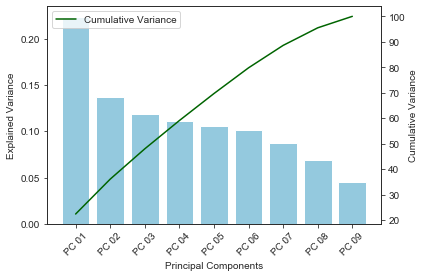

In [29]:
plt.figure(figsize=(200,5))
fig, ax = plt.subplots()
ax.set_xticklabels(labels=pcLabels,  rotation=45)
ax2 = ax.twinx()
sns.barplot(x='Principal Components', y='Explained Variance', data=screeDF, ax=ax, color='skyblue')
sns.lineplot(x='Principal Components', y='Cumulative Variance', data=screeDF, ax=ax2, color='darkgreen', label="Cumulative Variance")
# sns.lineplot(x='Principal Components', y='Explained Variance', data=screeDF, ax=ax, color='midnightblue', label="Explained Variance" )

plt.savefig("reports/05.03.a PCA Explained and Cummulative Variance.png", dpi=300)

In [15]:
covar_matrix.components_[1,:]

array([-1.77438548e-02,  5.09412187e-02, -4.83146773e-04,  6.69253259e-01,
        6.63099700e-01,  2.74420087e-01, -1.48533054e-01, -9.94893711e-02,
       -4.71401085e-02])

In [16]:
pcLabeled = pd.DataFrame([X_std.columns,covar_matrix.components_[0],covar_matrix.components_[1]], index=["Variable","PC 01", "PC 02"]).transpose()
pcLabeled

,Variable,PC 01,PC 02
0,Service_Component_WBS_aff,0.575438,-0.0177439
1,Urgency,0.27665,0.0509412
2,KM_number,0.571424,-0.000483147
3,Count_Related_Interactions,0.00933226,0.669253
4,Count_Related_Incidents,0.0294305,0.6631
5,Count_Related_Changes,0.0127138,0.27442
6,Open_Time_HourOfDay,0.0417299,-0.148533
7,Open_Time_DayOfWeek,0.0252727,-0.0994894
8,CI_TypeSubType_aff,0.512168,-0.0471401


In [17]:
for line in range(pcLabeled.shape[0]):
    print(pcLabeled.loc[line,"Variable"])

Service_Component_WBS_aff
Urgency
KM_number
Count_Related_Interactions
Count_Related_Incidents
Count_Related_Changes
Open_Time_HourOfDay
Open_Time_DayOfWeek
CI_TypeSubType_aff


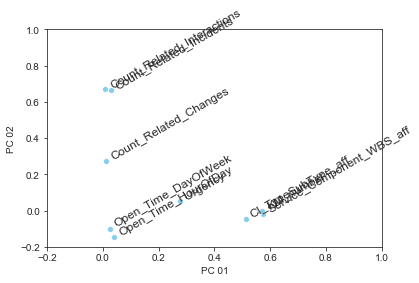

In [28]:
# plt.scatter(pcLabeled['PC 01'],pcLabeled['PC 02'], marker='x')

p1 = sns.scatterplot(data = pcLabeled, x=pcLabeled['PC 01'], y=pcLabeled['PC 02'], color='skyblue', )

# add annotations one by one with a loop
for line in range(pcLabeled.shape[0]):
   p1.text(pcLabeled.loc[line,"PC 01"]+0.01, 
            pcLabeled.loc[line,"PC 02"]+0.01, 
   pcLabeled.loc[line,"Variable"], 
   horizontalalignment='left', 
   size='large', 
   rotation=30)
plt.xlim(-0.2,1)
plt.ylim(-0.2,1)
plt.savefig("reports/05.03.b Variance within first two PCs.png", dpi=300)


plt.show()
